<a href="https://colab.research.google.com/github/FreeOfConfines/ExampleNNWithKerasAndTensorflow/blob/master/Review_of_Gradients%2C_Hessians%2C_and_Newton's_Method_with_Examples_Implemented_in_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Review of Gradients, Hessians, and Newton's Method with Examples Implemented in Tensorflow

#Getting Started

In a [previous material](https://colab.research.google.com/gist/FreeOfConfines/63644a6bac784d7133c66228673b18a7/review-of-functions-derivatives-and-gradient-descent-algorithm.ipynb#scrollTo=sFgIKGldCEbE), we had reviewed functions, derivativers, and methods, Gradient Descent and Newton's, to minimize and maximize these functions. In this material, we will familiarize with extension of derivatives (or parital differentives) to gradients over multiple dimensions. Interest in this extension isn't just academic but gradients and gradient based methods are used all the time in optimization and learning algorithms.

In this treatment, I will review the concepts in some detail and provide a simple and yet demonstrative example(s). The task of computing gradients, computing Hessian,  implementing gradient-descent algorithm and Newton's methods is done in Tensorflow / Python.

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import nbconvert

#Gradient and Hessian Matrix of 2-D Function

##References

* K. B. Peterson, M.S. Pederson, "The Matrix Cookbook," Link: http://matrixcookbook.com

##Definitions

Let us first pick a $f(x)$ to work with through this treatment: 

For sake of simplicity, we will assume $f(x)$ that evaluates to a number at any $x$ but $x$ is not a number but a $2 \times 1$ vector, i.e., two-dimensional. Note concepts that we will discuss is not limited to two dimensions but extend naturally to multiple dimensions.

The function is defined as follows:

\begin{equation}
f(x) = x^{T}Ax + b^Tx+c, 
\end{equation}

where $A$ is a $2 \times 2$ matrix, $b$ is a $2 \times 1$ vector, and $c$ is a number. Note $f(x)$ will compute to a number. $A$, $b$, and $c$ are parameters of the equation, i.e., user-defined or defined by the given problem. The vector $x$ has two entries or two dimensions $<x_1, x_2>$.

So, why did we pick this equation? The equation is quadratic, i.e., elements of $x$ get raised to power of $2$ but no more, and such equation show up as cost function in many optimization problems. For instance, find $x$ that minimizes $Dx=e$ will lead to a cost function that looks like the $f(x)$ above.

Gradient of $f()$ is a $2 \times 1$ vector of partial derivatives with $x_1$ and $x_2$:
\begin{equation}
\nabla f_x = 
\begin{bmatrix}
\frac{\partial f} {\partial x_1}, \frac{\partial f} {\partial x_2}
\end{bmatrix}^T
\end{equation}

Hessian matrix is an extension of the second derivative in two dimensions and is defined as follows:
\begin{equation}
H_x = 
\begin{bmatrix}
\frac{\partial^2 f} {\partial x_1^2} & \frac{\partial^2 f} {\partial x_1 \partial x_2} \\
\frac{\partial^2 f} {\partial x_1 x_2} & \frac{\partial^2 f} {\partial x_2^2}
\end{bmatrix}
\end{equation}

## Compute Gradient of $f(x)$

Skip this section if you are not interested in linear algebraic manipulations.

More straightforward but tedious method to compute gradient $\nabla f_x$ is to expand out $f(x)$ with $x_1$ and $x_2$. Define $x$ and $A$ as follows to do the expansion:

\begin{equation}
x^T := 
\begin{bmatrix}
x_1 & x_2
\end{bmatrix} \\
A :=
\begin{bmatrix}
a_1 & a_2 \\
a_3 & a_4
\end{bmatrix}
\end{equation}

After algebraic manipulation, you should arrive at

\begin{equation}
f(x) = a_1x_1^2+a_4x_2^2+(a_1 + a_3)x_1x_2+ b_1x_1+b_2x_2+c
\end{equation}

Therefore, gradient of $f(x)$ is
\begin{equation}
\nabla f_x^T =
\begin{bmatrix}
2x_1a_1 +(a_2 + a_3)x_2+b_1 & 2x_2a_4+(a_2+a_3)x_1+b_2, \\
\end{bmatrix} \\
 =
\begin{bmatrix}
x_1 & x_2 \\
\end{bmatrix}
\begin{bmatrix}
2a_1 & (a_2+a_3) \\
(a_2+a_3) & 2a_4
\end{bmatrix} \\
= x(A+A^T)
\end{equation}

As an aside, in typical cost functions $A$ is symmetric and therefore, the equation above simplifies to $2x^TA$.

## Compute Hessian of $f(x)$

Skip this section if you are not interested in linear algebraic manipulations.

More straightforward but tedious method to compute Hessian from the expanded expression of $f(x)$ as before:
\begin{equation}
f(x) = a_1x_1^2+a_4x_2^2+(a_1 + a_3)x_1x_2+ b_1x_1+b_2x_2+c
\end{equation}

Computing partial derivative specified in the definition of Hessian matrix results in the following:
\begin{equation}
H_x=
\begin{bmatrix}
2a_1 & (a_2+a_3) \\
(a_2+a_3) & 2a_4
\end{bmatrix} \\
= (A+A^T)
\end{equation}

* Note that Hessian matrix is a symmetric matrix which is consistent with the definition (notice cross-diagonal entries in the definition of Hessian matrix).
* For this specific example, Hessian matrix is independent of $x$ which will not be the case if $f(x)$ has a degree larger than 2.
* The Matrix Cookbook (reference above) is an excellent resource that shows you how to take derivatives of matrix equations without having to expand them all out.


* Choose one of the three examples (*pickAnExample* is the user input) above and run through the subsequent computations. Each one of the examples has a function whose surface is different from the others. 

# Compute Gradient and Hessian : Tensorflow Implementation with *feed_dict* Option

In this section, we will work with one of three examples and there is an option in the code below to make that choice. All three examples have inputs that are two dimensional (as it was in the section above) and output that is one dimensional. Surface of these functions are different from one another and hence, creating instances of some of the possibilities.

In [0]:
# Define a quadratic function f() = $x^{T}Ax + b^{T}$x
# User input
pickAnExample = 2 # choices 0,1,2
lGrid = 100 # length of a grid

# Pick an example based on user input
if pickAnExample == 0:
  A = tf.constant([[4.,1.],[3.,11.]]) # A is a 2 x 2 matrix
  bT = tf.constant([[13.,2.]]) # bT is a transpose of b...b is a column vector
elif pickAnExample == 1:
  A = tf.constant([[-4.,0.],[0.,-8.]]) # A is a 2 x 2 matrix
  bT = tf.constant([[0.,0.]]) # bT is a transpose of b...b is a column vector
elif pickAnExample == 2:
  A = tf.constant([[-4.,3.],[-6.,8.]]) # A is a 2 x 2 matrix
  bT = tf.constant([[2.,3.]]) # bT is a transpose of b...b is a column vector



In the code below, we evaluate the chosen (quadratic) function at different $x$, compute its gradients, and Hessian.

In [0]:
# define quadratic function
x = tf.placeholder(tf.float32, shape=(2,1))
xTAx = tf.matmul(tf.matmul(x,A,transpose_a=True,transpose_b=False),x)
bTx = tf.matmul(bT,x, transpose_a=False, transpose_b=False)

fx = tf.add(xTAx, bTx)

# Compute first and second gradient of f(x)
dfx = tf.gradients(ys=fx,xs=[x])
#d2fx = tf.gradients(ys=dfx,xs=[x]) # check comment section below
hessfx = tf.hessians(ys=fx,xs=[x])

with tf.Session() as sess:
  # Generate uniform random numbers
  np.random.seed(0) # this fixes seed to 0, remove this if you don't care about data repeatability across runs
  inRand = np.random.uniform(size=(1,lGrid), low=-10., high=10.)
  
  # Form a grid of input of dimension lGrid x lGrid (here x1 and x2)
  in_x1 = np.tile(inRand,lGrid) # array of length= lGrid^2
  in_x2 = np.kron(inRand,np.ones((1,lGrid))) # array of length=lGrid^2
  in_x = np.vstack((in_x1, in_x2)) # matrix of size= 2 x lGrid^2
  
  # Initialize output variables
  out_fx = np.empty([1,0])
  out_dfx = np.empty(shape=[2,0])  
  out_hessfx = np.empty(shape=[0,2,2])
  
  # Iterate over the dataset
  for i in range(lGrid**2):
    # Evaluate f(x) at various x
    temp = sess.run(fx, feed_dict={x: np.transpose([in_x[:,i]])})    
    temp = np.array(temp)
    out_fx = np.append(out_fx,temp)
       
    # Evaluate f'(x) at various x values
    temp = sess.run(dfx, feed_dict={x:np.transpose([in_x[:,i]])})
    temp = np.asarray(temp).squeeze(axis=0) # removes single-dimension entries, not necessary or a specified subset
    out_dfx = np.append(out_dfx,temp, axis=1)
     
    # Evaluate hessian at various x values
    temp = sess.run(hessfx, feed_dict={x:np.transpose([in_x[:,i]])})
    temp = np.asarray(temp).squeeze() # to remove single-dimensional entries or specified such entries   
    out_hessfx = np.append(out_hessfx, [temp], axis=0) # need [temp] to add an extra dimension
        
  #print(in_x1[0].shape,out_fx.shape,out_dfx.shape,out_d2fx.shape)
  print(out_hessfx[0])
  print(np.linalg.eig(out_hessfx[0]))
  

I want to add comments on portions of code that proved a bit tricky and these comments should help anyone trying to do something similar:

1.   In the one-dimensional case, it was possible to pass a vector of input values (i.e., x) as part of *feed_dict* option of *run* method in Tensorflow. With matmul in function, I couldn't figure out how to pass set of vectors (i.e., x is a collection of $2 \times 1$ vectors) as input using *feed_dict*. Therefore, I have chosen to run a *for* loop over all inputs one at a time.
2.   In the one-dimensional case, we computed second derivative by performing *gradient(gradient(f(x)))*. In the two-dimensional case, this approach does not work; there is a mention online that *gradient(gradient(.))* computes sum of main diagonal terms of Hessian (refer: Laplace operator) but I didn't observe this.
* Hessian of a matrix is computed using *hessians* function supported by Tensorflow; *Hessians* adds extra dimensions (one-entry dimensions) in its output and we deal with this using *squeeze* operator.

## Plot 3D

Plotting 3D figures of the quadratic surface.

(1, 10000) (1, 10000) (10000,)


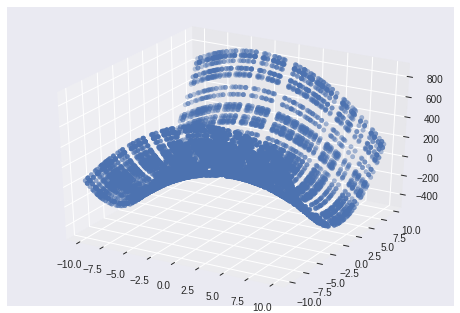

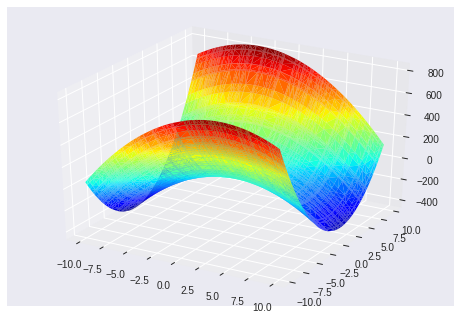

In [0]:
plt.figure(1)
fig1 = plt.axes(projection='3d')
fig1.scatter3D(in_x1, in_x2, out_fx)

from matplotlib import cm

plt.figure(3)
print(in_x1.shape,in_x2.shape, out_fx.shape)
fig3 = plt.axes(projection='3d')
fig3.plot_trisurf(in_x1[0],in_x2[0],out_fx, linewidth=2, cmap=cm.jet, antialiased=True)

plt.show()


You may be working with one of the three examples based on your choice for *pickAnExample*. Surfaces of these functions should look as follows:
* **Example 1:** Surface is convex (like an upside down cup) with a well-defined global minimum
* **Example 2:** Surface is concave (like a cup) with a well-defined global maximum
* **Example 3:** Surface is neither concave or convex and does not have a global maximum or minimum

Feel free to play with entries in $A$ and $b$ and examine surfaces of resultant functions.

# Compute Gradient and Hessian: Tensorflow Implementation with Data Pipeline

## References
* F. Zuppichini, "How to use Dataset in Tensorflow," Link: https://towardsdatascience.com/how-to-use-dataset-in-tensorflow-c758ef9e4428
* D. Schmidt, "Why tf.data is much better than feed_dict and how to build a simple data pipeline in 5 minutes," Link: https://dominikschmidt.xyz/tensorflow-data-pipeline/

## Data Pipelining
My understanding on this subject is limited and stems from reading online. I understand that *feed_dict* is a poor option to send data to GPU for processing. The [Schmidt] reference has an illustration which shows that CPU & IO unit waits for GPU to complete before processing next input which affects GPU utilization. *tf.data* is high-level API that helps resolve the issue with GPU utlization by allowing to create a simple data pipeline.

In the example below, we set up a simple pipeline using one-shot iterator. It is not clear (in this particular example) if pipelining helps over what is done in Method-1; if you have the answer, feel free to comment below. Besides *tf.data* makes it easy to form large datasets from multiple datasets or files, creates dataset batches, etc.

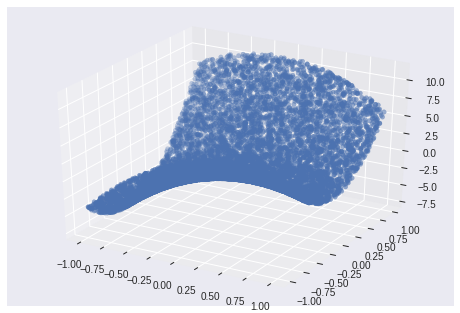

In [0]:
# Define a quadratic function f() = $x^{T}Ax + b^{T}$x

# User input
#A = tf.constant([[4.,0.],[0.,8.]]) # A is a 2 x 2 matrix
#bT = tf.constant([[0.,0.]]) # bT is a transpose of b...b is a column vector

lGrid = 100 # length of a grid

# ----------------------Unique to Method-2-------------------------------------
# Creating dataset
# Generate uniform random numbers
np.random.seed(0) # this fixes seed to 0, remove this if you don't care about data repeatability across runs
tempRand = np.random.uniform(size=(lGrid**2,2), low=-1., high=1.)

# Create a dataset and one-shot iterator
inDataset = tf.data.Dataset.from_tensor_slices(tempRand)
inDataIter = inDataset.make_one_shot_iterator()
in_x = inDataIter.get_next()
# ----------------------Unique to Method-2-------------------------------------

# define quadratic function
x = tf.placeholder(tf.float32, shape=(2,1))
xTAx = tf.matmul(tf.matmul(x,A,transpose_a=True,transpose_b=False),x)
bTx = tf.matmul(bT,x, transpose_a=False, transpose_b=False)

fx = tf.add(xTAx, bTx)

with tf.Session() as sess:
  
  # Initialize output variables
  out_fx = np.empty([1,0])
  
  # Iterate over the dataset
  for i in range(lGrid**2):
    
    # Evaluate f(x) at various x
    tempInput = np.transpose([sess.run(in_x)])
    temp = sess.run(fx, feed_dict={x:tempInput})    
    temp = np.array(temp)
    out_fx = np.append(out_fx,temp)
    

# Plotting the function in 3D
plt.figure(1)
fig1 = plt.axes(projection='3d')
fig1.scatter3D(tempRand[:,0], tempRand[:,1], out_fx)
plt.show()

Some additional comments about the code snippet above:

* Dataset is set up differently from Method-1; here dataset has two columns and $lGrid^2$ rows because *get_next* operator seems to pick one row of data at a time. This behavior is likely the result of *from_tensor_slices* method.

## Function Minimization / Maximization

In this section, we will discuss the minimization problem and the techniques apply very similarly to maximization problems as well. At any local minima (or maxima) of function $f(x)$, gradient vanishes, i.e., $\nabla f_x=0$, where $0$ is a zero-vector of appropriate dimensions. Such a point $x$ where gradient vanishes can mean one of the following four possibilities:

* $x$ is a local maxima if all eigen values of Hessian $H_x$ are all positive (check out Example #2)
* $x$ is a local minima if all eigen values of Hessian $H_x$ are all negative (check out Example #1)
* $x$ is a saddle point if eigen values of Hessian $H_x$ include positive and negative values (check out Example #3)
* If one of the eigen values is zero, then this test is inconclusive

In the code below, we compute eigen values to help verify against the above rules about maxima and minima.

In [0]:
# Analyze Hessian Matrix
# One Hessian matrix for each value of x but note that
# (for the given cost function) all Hessian matrices are the same and independent of x
print("Hessian Matrix[0]=", out_hessfx[0])
print("Hessian Matrix[1]=", out_hessfx[1])

# Eigen values of Hessian Matrix
eigVal, eigVec = np.linalg.eig(out_hessfx[0])
print("eigen value=", eigVal)
print("eigen vector==", eigVec)

Hessian Matrix[0]= [[-8. -3.]
 [-3. 16.]]
Hessian Matrix[1]= [[-8. -3.]
 [-3. 16.]]
eigen value= [-8.36931688 16.36931688]
eigen vector== [[-0.99250756  0.12218326]
 [-0.12218326 -0.99250756]]


Note that Hessian matrices, printed above, are equal to one another $\implies$ it is independent of input $x$. This is so because the function is quadratic.

In [0]:
# For minimization problem, assign 0 or 2 to pickAnExample
if pickAnExample==1:
  print("Error! Surface of the function is suitable for maximization problem. Choose options 0 or 2")

## Gradient Optimization with Tensorflow's Method

In a [previous article](https://colab.research.google.com/gist/FreeOfConfines/63644a6bac784d7133c66228673b18a7/review-of-functions-derivatives-and-gradient-descent-algorithm.ipynb#scrollTo=sFgIKGldCEbE), we have described the gradient descent algorithm in detail. Gradient of a function points in the direction where the function is maximized and therefore, the algorithm chooses to move in a direction opposite to the gradient. Gradient descent algorithm in multi-dimensional space is similar to that in one-dimensional space and the update equation is as follows:
\begin{equation}
x^{(n+1)}=x^{(n)}-\delta\nabla f_{x^{(n)}},
\end{equation}
where 

* $x^{(n+1)}$ is the next guess computed from gradient evaluated at $x^{(n)}$
* $\delta$ is a number that serves as learning rate,
* $\nabla f_{x^{(n)}}$ is gradient vector evaluated at $x^{(n)}$

Below is an implementation of the gradient descent algorithm.



In [0]:
# User Input
nLearningSteps = 1000
learningRate = 0.05

# define quadratic function
x = tf.Variable(initial_value=[[5.],[6.]]) # Changing x from a Placeholder to Variable
xTAx = tf.matmul(tf.matmul(x,A,transpose_a=True,transpose_b=False),x)
bTx = tf.matmul(bT,x, transpose_a=False, transpose_b=False)

fx = tf.add(xTAx, bTx)

# define optimizer
optimizer = tf.train.GradientDescentOptimizer(learningRate)
train = optimizer.minimize(fx)

with tf.Session() as sess:
  
  # Initialize variables
  sess.run(tf.global_variables_initializer())
  
  # Iterate through
  for _ in range(nLearningSteps):
    sess.run(train)
    #print("Step #", _, "f(x):", sess.run(fx), "x:", sess.run(x))

  print(sess.run(x))


## Newton's Method with Tensorflow

In a [previous article](https://colab.research.google.com/gist/FreeOfConfines/63644a6bac784d7133c66228673b18a7/review-of-functions-derivatives-and-gradient-descent-algorithm.ipynb#scrollTo=sFgIKGldCEbE), we have described the Newton's method in detail. As in the one-dimensional case, function $f(x)$ can be approximated with first three terms of the Taylor's series:
\begin{equation}
f(x+\gamma) \approx f(x)+\frac{1}{1!} (\nabla f_x)^{T}\gamma+\frac{1}{2!} \gamma^TH_x\gamma,
\end{equation}
where $\gamma$ is an update vector of the same dimension as $x$. Let us find $\gamma$ that minimizes (or maximizes) RHS of the above equation, we do that by taking the gradient of the approximation (i.e.,RHS) and setting it to zero.
\begin{equation}
0+\nabla f_x +\frac{2}{2}H_x\gamma = 0 \\
\implies \gamma = (H_x)^{-1} \nabla f_x
\end{equation}

Therefore, the update equation from one iteration to the next look like this:
\begin{equation}
x^{(n+1)}=x^{(n)}+\gamma^{(n)},
\end{equation}
$\gamma^{(n)}$ is the update in the n-th step of this iterative algorithm. Below is an implementation of the Newton's method.



In [0]:
# User defined parameters
#A = tf.constant([[-4.,3.],[-6.,8.]]) # A is a 2 x 2 matrix
#bT = tf.constant([[2.,3.]]) # bT is a transpose of b...b is a column vector

nLearningSteps = 100 #000

# define quadratic function
x = tf.Variable(initial_value=[[-1.],[-2.]]) # Changing x from a Placeholder to Variable
xTAx = tf.matmul(tf.matmul(x,A,transpose_a=True,transpose_b=False),x)
bTx = tf.matmul(bT,x, transpose_a=False, transpose_b=False)

fx = tf.add(xTAx, bTx)

# Compute first and second gradient of f(x)
dfx = tf.squeeze(tf.gradients(ys=fx,xs=[x]), axis=0) # removing one-entry dimensions using squeeze
hessfx = tf.squeeze(tf.hessians(ys=fx,xs=[x])) # we remove the one-entry dimensions using squeeze

# Newton's Method Update
delta = tf.matmul(tf.matrix_inverse(hessfx),dfx)
update = x.assign_sub(delta)

with tf.Session() as sess:
  
  # Initialized variables
  sess.run(tf.global_variables_initializer())
  
  # Iterate through
  for _ in range(nLearningSteps):
    print(sess.run(delta), sess.run(x))
    print("--------")
    sess.run(update)
  
  print("arg min x= ", sess.run(x))
  print("min f(x)= ", sess.run(fx))
  eigVal, eigVec = np.linalg.eig(sess.run(hessfx))
  print("Eigen Values= ", eigVal)



Note that Newton's method on the quadratic function (as is the case in our examples) converges with the first iteration and this is to be expected because:

Newton's method approximates the underlying function $f(.)$ with first three terms of its Taylor series, finds $x$ that minimizes or maximizes this approximation. In our examples, $f(.)$ is quadratic and therefore, its approximation is the function itself. Henc, Newton's method converges after the first step for our examples.

Here are some comments specific to the above code snippet:

* $x$ is defined as a variable instead of a placeholder because this will be altered along the way as we find the minimum of the function $f(x)$.
* $x$ is a variable and therefore, it is initialized using *global_variable_initializer*.
* Introduced *squeeze* operations on *dfx* and *hessfx* to remove single-entry dimensions
